In [1]:
!pip install feature-engine
!pip install neuralforecast

   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 378.6/378.6 kB 18.3 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 261.0/261.0 kB 14.4 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 285.8/285.8 kB 19.7 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 823.1/823.1 kB 40.7 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 68.5/68.5 MB 10.5 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 363.4/363.4 MB 4.1 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from feature_engine.wrappers import SklearnTransformerWrapper
from neuralforecast import NeuralForecast
from neuralforecast.models import TCN
from time import time
import math

## Preprocessing

In [3]:
def nixtla_format_df(data, time_column, targets):
    """
    Converte o DataFrame para o formato esperado pelo Nixtla.
    """
    data = data.rename(columns={time_column: 'ds'})
    # data['ds'] = pd.to_datetime(data['ds'])
    data = data.melt(
        id_vars='ds',
        value_vars=targets,
        var_name='unique_id',
        value_name='y'
    )

    return data


ROOT = "/content/drive/MyDrive/dl-project"
DATA_FILE = f"{ROOT}/data/riser_pq_uni.csv"
SEED = 78

rename_dict = {
    "Time (sec)": "time",
    "Pressure (bar) @x_{99}=56.9453": "pressure_1",
    "Pressure (bar) @x_{105}=60.4141": "pressure_2",
    "Pressure (bar) @x_{109}=62.7266": "pressure_3",
    "Pressure (bar) @x_{114}=65.6172": "pressure_4",
    "Pressure (bar) @x_{119}=68.5078": "pressure_5",
    "Pressure (bar) @x_{124}=71.3984": "pressure_6",
    "Pressure (bar) @x_{128}=73.7109": "pressure_7",
    "Gas mass rate (kg/sec)": "gas_flow_rate",
    "Liquid mass rate (kg/sec)": "liquid_flow_rate",
}

TRAINING_STEPS = 1500
TIME = ['time']
FEATURES = [
    'pressure_1',
    'pressure_2',
    'pressure_3',
    'pressure_4',
    'pressure_5',
    'pressure_6',
    'pressure_7'
]
TARGETS = ['liquid_flow_rate', 'gas_flow_rate']

time_spent = {}
input_size = 187
horizon = 187

In [4]:
data = pd.read_csv(DATA_FILE)
data = (
    data.rename(columns=rename_dict)
    [TIME + TARGETS]
)
data.head()

time  liquid_flow_rate  gas_flow_rate
0  0.00000            40.085       0.015360
1  0.29493            81.781       0.031328
2  0.59320            61.016       0.024000
3  0.89486            39.192       0.016026
4  1.19880            21.469       0.009156

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


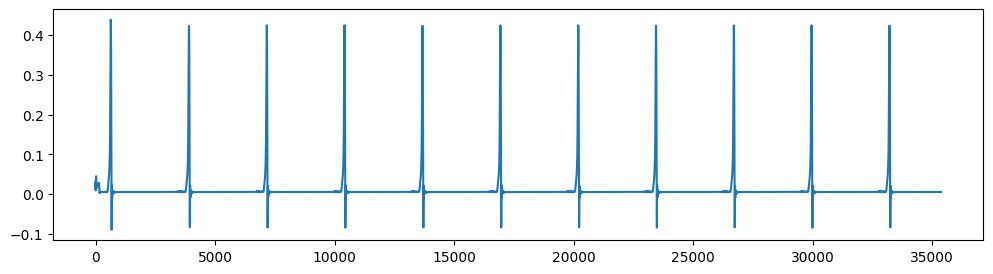

In [6]:
data['gas_flow_rate'].plot(figsize=(12, 3));

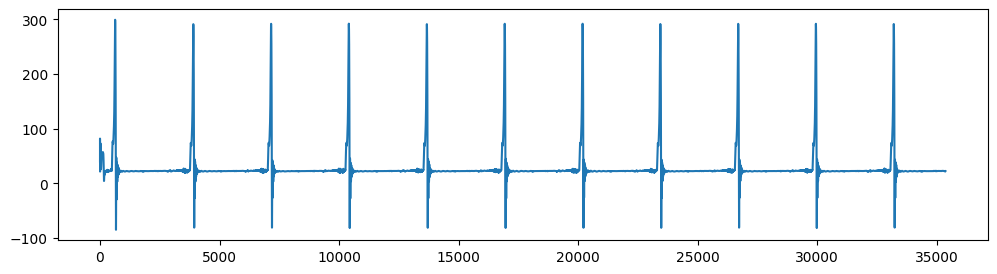

In [7]:
data['liquid_flow_rate'].plot(figsize=(12, 3));

In [8]:
# Converter a s√©rie temporal para um espa√ßamento uniforme de um segundo
data_ = (
    data[TIME + TARGETS]
    .assign(time=np.floor(data['time']).astype(int))
    .groupby(['time'])[TARGETS].mean()
    .reset_index()
    .sort_values(by='time')
)

data_

time  liquid_flow_rate  gas_flow_rate
0        0         55.518500       0.021678
1        1         26.402000       0.011846
2        2         51.498667       0.026317
3        3         62.201250       0.035752
4        4         68.307667       0.041210
...    ...               ...            ...
2996  2996         22.713000       0.005171
2997  2997         22.696038       0.005170
2998  2998         22.470111       0.005121
2999  2999         22.205667       0.005063
3000  3000         22.160000       0.005053

[3001 rows x 3 columns]

In [9]:
train_data = data_.loc[data_['time'] <= TRAINING_STEPS, :]
test_data = data_.loc[data_['time'] > TRAINING_STEPS, :]

In [10]:
scaler = SklearnTransformerWrapper(MinMaxScaler(), variables=TARGETS)

train_data_scaled = scaler.fit_transform(train_data)
test_data_scaled = scaler.transform(test_data)

In [11]:
# Prepara√ßao dos dados para usar o Nixtla

train_timeseries = train_data_scaled.rename(columns={'time': 'ds'})
# train_timeseries['ds'] = pd.to_datetime(train_timeseries['ds'])

train_timeseries_long = train_timeseries.melt(
    id_vars='ds',
    value_vars=['gas_flow_rate', 'liquid_flow_rate'],
    var_name='unique_id',
    value_name='y'
)

train_timeseries_long

ds         unique_id         y
0        0     gas_flow_rate  0.210728
1        1     gas_flow_rate  0.192040
2        2     gas_flow_rate  0.219544
3        3     gas_flow_rate  0.237477
4        4     gas_flow_rate  0.247850
...    ...               ...       ...
2997  1496  liquid_flow_rate  0.413149
2998  1497  liquid_flow_rate  0.421325
2999  1498  liquid_flow_rate  0.430661
3000  1499  liquid_flow_rate  0.440724
3001  1500  liquid_flow_rate  0.449838

[3002 rows x 3 columns]

### TCN

In [14]:
models = [
    TCN(
        h=horizon,
        input_size=input_size,
        max_steps=500,
        val_check_steps=50,
        early_stop_patience_steps=5,
        random_seed=SEED
    )
]

INFO:lightning_fabric.utilities.seed:Seed set to 78


### Training

In [15]:
start_time = time()
nf = NeuralForecast(
    models=models,
    freq=1
)

nf.fit(df=train_timeseries_long, val_size=horizon)
time_spent['training_time'] = time() - start_time

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.callbacks.model_summary:
  | Name            | Type                       | Params | Mode 
-----------------------------------------------------------------------
0 | loss            | MAE                        | 0      | train
1 | padder_train    | ConstantPad1d              | 0      | train
2 | scaler          | TemporalNorm               | 0      | train
3 | hist_encoder    | TemporalConvolutionEncoder | 131 K  | train
4 | context_adapter | Linear                     | 35.2 K | train
5 | mlp_decoder     | MLP                        | 16.6 K | train
-----------------------------------------------------------------------
183 K     Trainable params
0         Non-trainable params
183 K     Total params
0.735     Total estimated

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_steps=500` reached.


In [ ]:
# %load_ext tensorboard

# %tensorboard --logdir lightning_logs/

In [16]:
print("Tempo de treino:", round(time_spent['training_time'], 1), "seconds")

Tempo de treino: 474.3 seconds


### Prediction

In [17]:
# Junta os √∫ltimos 'input_size' pontos do treino com os dados de teste
predictions_input_df = pd.concat([train_data_scaled.tail(input_size), test_data_scaled])

In [18]:
# Cria janelas deslizantes do DataFrame para fazer predi√ß√µes
inputs_for_predicions_list = [
    predictions_input_df.iloc[i:i + input_size]
    for i in range(0, len(predictions_input_df) - input_size + 1, horizon)
]

In [ ]:
start_time = time()

forecasts_list = []
for input_df in inputs_for_predicions_list:
    input_df = nixtla_format_df(
        data=input_df,
        time_column=TIME[0],
        targets=TARGETS
    )
    forecast = nf.predict(df=input_df)
    forecasts_list.append(forecast)

time_spent['prediction_time'] = time() - start_time

In [20]:
print("Tempo de predi√ß√£o:", round(time_spent['prediction_time'], 1), "seconds")

Tempo de predi√ß√£o: 1.2 seconds


In [21]:
forecasts_output = pd.concat(forecasts_list)
forecasts_output

unique_id    ds       TCN
0       gas_flow_rate  1501  0.278508
1       gas_flow_rate  1502  0.285327
2       gas_flow_rate  1503  0.288652
3       gas_flow_rate  1504  0.298222
4       gas_flow_rate  1505  0.306770
..                ...   ...       ...
369  liquid_flow_rate  3179  0.277234
370  liquid_flow_rate  3180  0.277137
371  liquid_flow_rate  3181  0.276790
372  liquid_flow_rate  3182  0.277029
373  liquid_flow_rate  3183  0.277487

[3366 rows x 3 columns]

In [22]:
ground_truth = nixtla_format_df(
    data=test_data_scaled,
    time_column=TIME[0],
    targets=TARGETS
)
ground_truth

ds         unique_id         y
0     1501  liquid_flow_rate  0.459397
1     1502  liquid_flow_rate  0.471283
2     1503  liquid_flow_rate  0.484231
3     1504  liquid_flow_rate  0.496564
4     1505  liquid_flow_rate  0.510421
...    ...               ...       ...
2995  2996     gas_flow_rate  0.179354
2996  2997     gas_flow_rate  0.179351
2997  2998     gas_flow_rate  0.179258
2998  2999     gas_flow_rate  0.179147
2999  3000     gas_flow_rate  0.179129

[3000 rows x 3 columns]

In [25]:
TCN_results = pd.merge(
    ground_truth,
    forecasts_output,
    on=['unique_id', 'ds'],
    how='inner'
)
TCN_results

ds         unique_id         y       TCN
0     1501  liquid_flow_rate  0.459397  0.597344
1     1502  liquid_flow_rate  0.471283  0.624499
2     1503  liquid_flow_rate  0.484231  0.612762
3     1504  liquid_flow_rate  0.496564  0.650765
4     1505  liquid_flow_rate  0.510421  0.686981
...    ...               ...       ...       ...
2995  2996     gas_flow_rate  0.179354  0.179112
2996  2997     gas_flow_rate  0.179351  0.176852
2997  2998     gas_flow_rate  0.179258  0.177022
2998  2999     gas_flow_rate  0.179147  0.176746
2999  3000     gas_flow_rate  0.179129  0.176795

[3000 rows x 4 columns]

### Evaluation

In [26]:
# Salvar Resultados
TCN_results.to_csv(f"{ROOT}/results/03-multivariate/TCN.csv", index=False)

In [27]:
y_pred_oil = TCN_results.query('unique_id=="liquid_flow_rate"')['TCN']
y_pred_gas = TCN_results.query('unique_id=="gas_flow_rate"')['TCN']

y_true_oil = TCN_results.query('unique_id=="liquid_flow_rate"')['y']
y_true_gas = TCN_results.query('unique_id=="gas_flow_rate"')['y']

print("MSE - Liquid Flow Rate:", mean_squared_error(y_true_oil, y_pred_oil))
print("MSE - Gas Flow Rate:", mean_squared_error(y_true_gas, y_pred_gas))

print("MAE- Liquid Flow Rate:", mean_absolute_error(y_true_oil, y_pred_oil))
print("MAE- Gas Flow Rate:", mean_absolute_error(y_true_gas, y_pred_gas))

MSE - Liquid Flow Rate: 0.0033414414610981017
MSE - Gas Flow Rate: 0.004732133062732815
MAE- Liquid Flow Rate: 0.018869241301636162
MAE- Gas Flow Rate: 0.014682333966810651


In [28]:
# M√©dia MSE
np.mean([mean_squared_error(y_true_oil, y_pred_oil), mean_squared_error(y_true_gas, y_pred_gas)])

np.float64(0.004036787261915458)

In [29]:
# M√©dia MAE
np.mean([mean_absolute_error(y_true_oil, y_pred_oil), mean_absolute_error(y_true_gas, y_pred_gas)])

np.float64(0.016775787634223407)

In [30]:
# Retornar para os valores originais.

scaled_test_data_wide = (
    nbeats_results
    .pivot(index='ds',
           columns='unique_id',
           values='y')
    .reset_index()
    .rename_axis(None, axis=1)
)

scaled_predicted_data_wide = (
    nbeats_results
    .pivot(index='ds',
           columns='unique_id',
           values='TCN')
    .reset_index()
    .rename_axis(None, axis=1)
)

In [31]:
original_test_data = scaler.inverse_transform(scaled_test_data_wide)
original_predicted_data = scaler.inverse_transform(scaled_predicted_data_wide)

In [32]:
(
    original_predicted_data
    .rename(
        columns={col: f'pred_{col}' for col in original_predicted_data.columns[1:]},
        inplace=True
    )
)

In [33]:
original_scale_results = pd.merge(
    original_test_data,
    original_predicted_data,
    on='ds',
    how='inner'
)
original_scale_results

ds  gas_flow_rate  liquid_flow_rate  pred_gas_flow_rate  \
0     1501       0.059084         91.592333            0.057341   
1     1502       0.064500         96.149750            0.060928   
2     1503       0.070651        101.114667            0.062678   
3     1504       0.076707        105.843333            0.067713   
4     1505       0.083670        111.156667            0.072210   
...    ...            ...               ...                 ...   
1495  2996       0.005171         22.713000            0.005044   
1496  2997       0.005170         22.696038            0.003855   
1497  2998       0.005121         22.470111            0.003944   
1498  2999       0.005063         22.205667            0.003799   
1499  3000       0.005053         22.160000            0.003825   

      pred_liquid_flow_rate  
0                144.485825  
1                154.897995  
2                150.397858  
3                164.969589  
4                178.855881  
...                     ...  
1495              22.329966  
1496              20.857418  
1497              20.844975  
1498              20.839615  
1499              20.719252  

[1500 rows x 5 columns]

In [34]:
y_pred_oil = original_scale_results['pred_liquid_flow_rate']
y_pred_gas = original_scale_results['pred_gas_flow_rate']

y_true_oil = original_scale_results['liquid_flow_rate']
y_true_gas = original_scale_results['gas_flow_rate']

In [35]:
print("=" * 50)
print("         MLPMultivariate Performance")
print("=" * 50)

# RMSE Section
print("\nüìä Root Mean Square Error (RMSE)")
print("-" * 35)
print(f"  Oil   : {math.sqrt(mean_squared_error(y_true_oil, y_pred_oil)):.4f}")
print(f"  Gas   : {math.sqrt(mean_squared_error(y_true_gas, y_pred_gas)):.4f}")

# R¬≤ Section
print("\nüéØ R-squared (R¬≤)")
print("-" * 20)
print(f"  Oil   : {r2_score(y_true_oil, y_pred_oil):.4f}")
print(f"  Gas   : {r2_score(y_true_gas, y_pred_gas):.4f}")

# MAE Section
print("\nüìà Mean Absolute Error (MAE)")
print("-" * 32)
print(f"  Oil   : {mean_absolute_error(y_true_oil, y_pred_oil):.4f}")
print(f"  Gas   : {mean_absolute_error(y_true_gas, y_pred_gas):.4f}")

print("=" * 50)

         MLPMultivariate Performance

üìä Root Mean Square Error (RMSE)
-----------------------------------
  Oil   : 22.1645
  Gas   : 0.0362

üéØ R-squared (R¬≤)
--------------------
  Oil   : 0.8400
  Gas   : 0.7701

üìà Mean Absolute Error (MAE)
--------------------------------
  Oil   : 7.2351
  Gas   : 0.0077


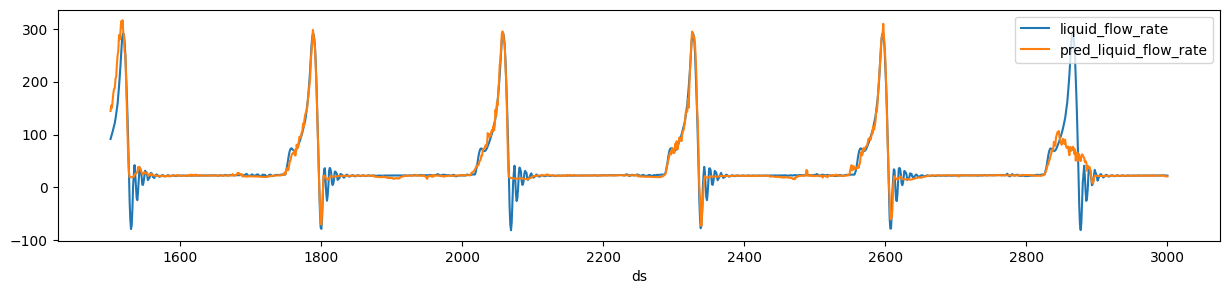

In [36]:
# OIL

(
    original_scale_results
    .plot(x='ds', y=['liquid_flow_rate', 'pred_liquid_flow_rate'], figsize=(15, 3))
);

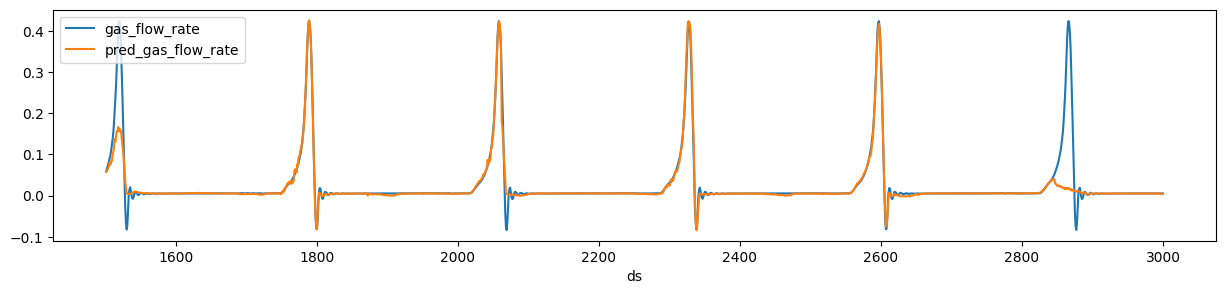

In [37]:
# GAS

(
    original_scale_results
    .plot(x='ds', y=['gas_flow_rate', 'pred_gas_flow_rate'], figsize=(15, 3))
);

In [ ]:
#####################
# Presentation plots
#####################
import matplotlib.pyplot as plt
import seaborn as sns
from typing import List, Optional, Tuple, Dict, Any


def create_pretty_plot(
    data,
    x_col: str,
    y_cols: List[str],
    title: Optional[str] = None,
    x_label: Optional[str] = None,
    y_label: Optional[str] = None,
    figsize: Tuple[float, float] = (15, 6),
    colors: Optional[List[str]] = None,
    line_styles: Optional[List[str]] = None,
    labels: Optional[List[str]] = None,
    style: str = 'seaborn-v0_8-whitegrid',
    legend_loc: str = 'upper right',
    rotate_x_labels: bool = True,
    show_grid: bool = True,
    alpha: float = 0.8,
    linewidth: float = 2,
    save_path: Optional[str] = None,
    **kwargs
) -> plt.Figure:
    """
    Create a prettified time series or line plot with customizable styling.

    Parameters:
    -----------
    data : DataFrame
        The dataset containing the data to plot
    x_col : str
        Column name for x-axis data
    y_cols : List[str]
        List of column names for y-axis data (multiple lines)
    title : str, optional
        Plot title. If None, auto-generates based on y_cols
    x_label : str, optional
        X-axis label. If None, uses x_col
    y_label : str, optional
        Y-axis label. If None, auto-generates
    figsize : Tuple[float, float], default (15, 6)
        Figure size (width, height)
    colors : List[str], optional
        Custom colors for each line. If None, uses default palette
    line_styles : List[str], optional
        Line styles for each line. If None, uses default styles
    labels : List[str], optional
        Custom labels for legend. If None, uses y_cols
    style : str, default 'seaborn-v0_8-whitegrid'
        Matplotlib style to use
    legend_loc : str, default 'upper right'
        Legend location
    rotate_x_labels : bool, default True
        Whether to rotate x-axis labels
    show_grid : bool, default True
        Whether to show grid
    alpha : float, default 0.8
        Line transparency
    linewidth : float, default 2
        Line width
    save_path : str, optional
        Path to save the plot. If None, doesn't save
    **kwargs : Additional arguments passed to plot()

    Returns:
    --------
    plt.Figure : The created figure object

    Examples:
    ---------
    # Basic usage
    fig = create_pretty_plot(
        data=df,
        x_col='date',
        y_cols=['actual', 'predicted']
    )

    # Custom styling
    fig = create_pretty_plot(
        data=df,
        x_col='date',
        y_cols=['actual', 'predicted'],
        title='My Custom Plot',
        colors=['blue', 'red'],
        line_styles=['-', '--'],
        labels=['Actual Values', 'Predicted Values']
    )
    """

    # Set style
    plt.style.use(style)

    # Default colors and line styles
    if colors is None:
        colors = ['#2E86AB', '#A23B72', '#F18F01', '#C73E1D', '#7209B7', '#2F9C0A']

    if line_styles is None:
        line_styles = ['-', '--', '-.', ':', '-', '--']

    if labels is None:
        labels = [col.replace('_', ' ').title() for col in y_cols]

    # Create figure and axis
    fig, ax = plt.subplots(figsize=figsize)

    # Plot each y column
    for i, y_col in enumerate(y_cols):
        color = colors[i % len(colors)]
        linestyle = line_styles[i % len(line_styles)]
        label = labels[i] if i < len(labels) else y_col

        ax.plot(data[x_col],
                data[y_col],
                linewidth=linewidth,
                label=label,
                color=color,
                alpha=alpha,
                linestyle=linestyle,
                **kwargs)

    # Set title
    if title is None:
        if len(y_cols) == 2 and any('pred' in col.lower() for col in y_cols):
            title = f'{y_cols[0].replace("_", " ").title()}: Actual vs Predicted'
        else:
            title = f'{", ".join([col.replace("_", " ").title() for col in y_cols])}'

    ax.set_title(title, fontsize=16, fontweight='bold', pad=20)

    # Set axis labels
    if x_label is None:
        x_label = x_col.replace('_', ' ').title()
    if y_label is None:
        y_label = 'Value'

    ax.set_xlabel(x_label, fontsize=12, fontweight='semibold')
    ax.set_ylabel(y_label, fontsize=12, fontweight='semibold')

    # Add legend
    ax.legend(loc=legend_loc,
              frameon=True,
              fancybox=True,
              shadow=True,
              fontsize=11)

    # Rotate x-axis labels if requested
    if rotate_x_labels:
        plt.xticks(rotation=45)

    # Add grid if requested
    if show_grid:
        ax.grid(True, alpha=0.3, linestyle='-', linewidth=0.5)

    # Improve layout
    plt.tight_layout()

    # Save if path provided
    if save_path:
        plt.savefig(save_path, dpi=300, bbox_inches='tight')

    # return fig

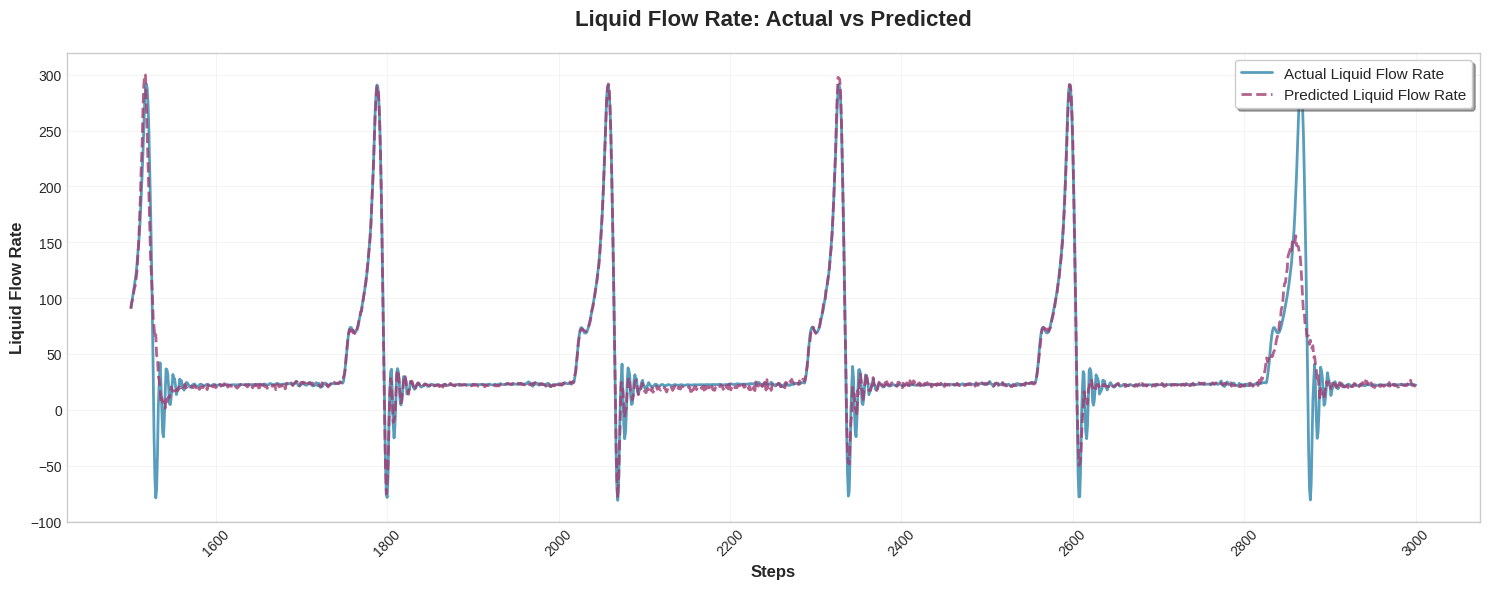

In [ ]:
create_pretty_plot(
    data=original_scale_results,
    x_col='ds',
    y_cols=['liquid_flow_rate', 'pred_liquid_flow_rate'],
    title='Liquid Flow Rate: Actual vs Predicted',
    x_label='Steps',
    y_label='Liquid Flow Rate',
    colors=['#2E86AB', '#A23B72'],
    line_styles=['-', '--'],
    labels=['Actual Liquid Flow Rate', 'Predicted Liquid Flow Rate'],
    figsize=(15, 6),
    alpha=0.8,
    linewidth=2
)

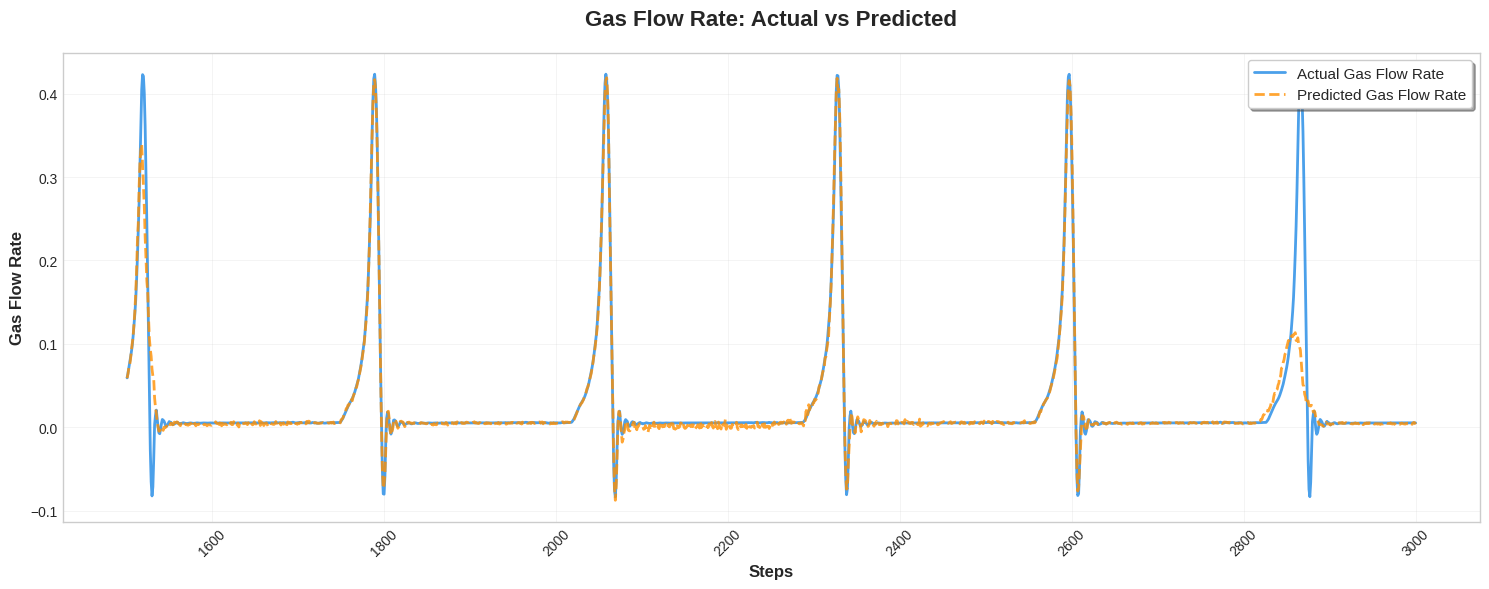

In [ ]:
create_pretty_plot(
    data=original_scale_results,
    x_col='ds',
    y_cols=['gas_flow_rate', 'pred_gas_flow_rate'],
    title='Gas Flow Rate: Actual vs Predicted',
    x_label='Steps',
    y_label='Gas Flow Rate',
    colors=['#1E88E5', '#FF8F00'],
    line_styles=['-', '--'],
    labels=['Actual Gas Flow Rate', 'Predicted Gas Flow Rate'],
    figsize=(15, 6),
    alpha=0.8,
    linewidth=2
)

In [ ]:
# Option 1 (Blue vs Orange):
# ['#1E88E5', '#FF8F00']
# Option 2 (Green vs Red):
# ['#43A047', '#E53935']
# Option 3 (Purple vs Yellow):
# ['#8E24AA', '#FDD835']
# Option 4 (Dark Blue vs Bright Pink):
# ['#1565C0', '#E91E63']
# Option 5 (Forest Green vs Orange):
# ['#2E7D32', '#FF5722']
# Option 6 (Navy vs Lime):
# ['#283593', '#8BC34A']
# Option 7 (Dark Red vs Cyan):
# ['#C62828', '#00BCD4']